In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 custom_conv2d_3 (CustomCon  (None, 32, 32, 1)         27        
 v2D)                                                            
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 1)         0         
 g2D)                                                            
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 66ms/step


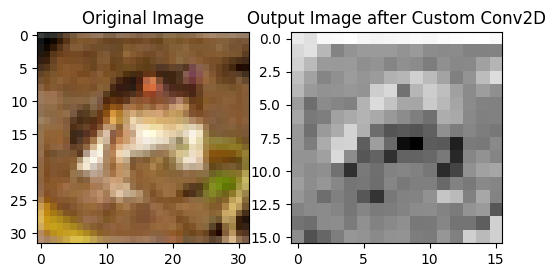

1/1 [==============================] - 0s 37ms/step


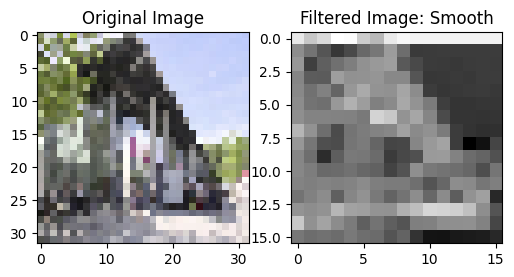

1/1 [==============================] - 0s 41ms/step


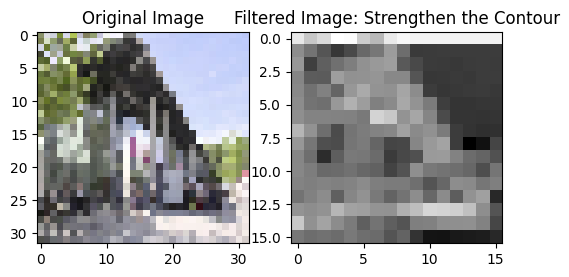

1/1 [==============================] - 0s 30ms/step


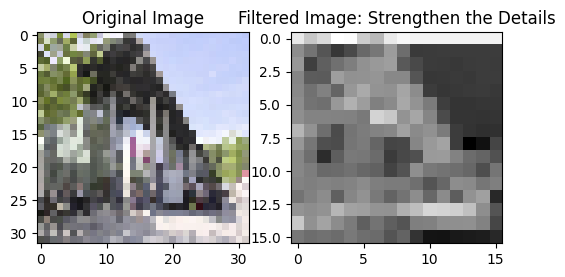

1/1 [==============================] - 0s 71ms/step


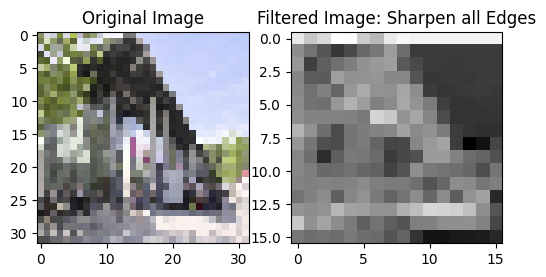

1/1 [==============================] - 0s 39ms/step


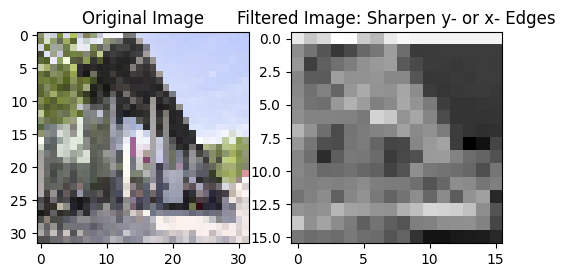

1/1 [==============================] - 0s 34ms/step


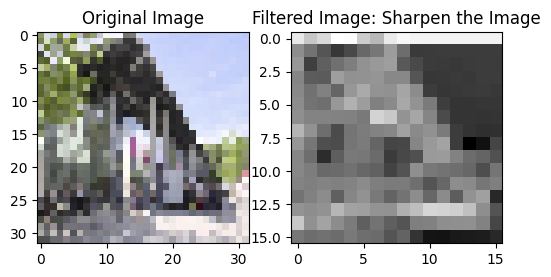

1/1 [==============================] - 0s 21ms/step


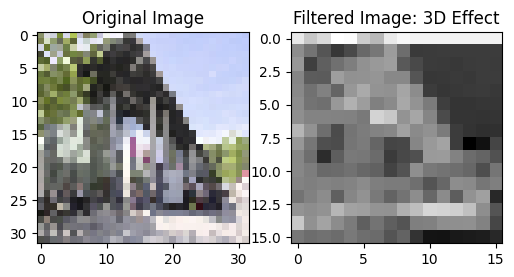

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 4)         112       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        2368      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)              

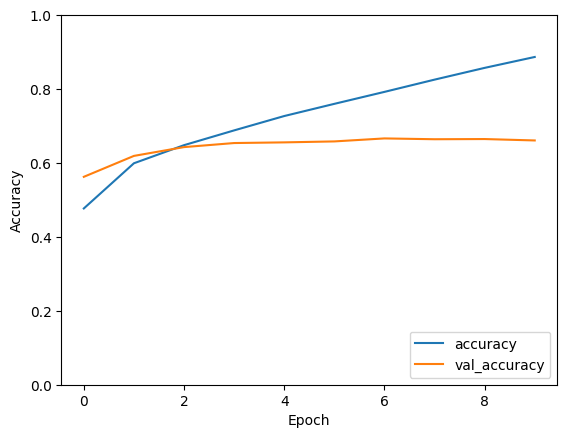

1/1 [==============================] - 0s 92ms/step
Predicted class: airplane
1/1 [==============================] - 0s 82ms/step


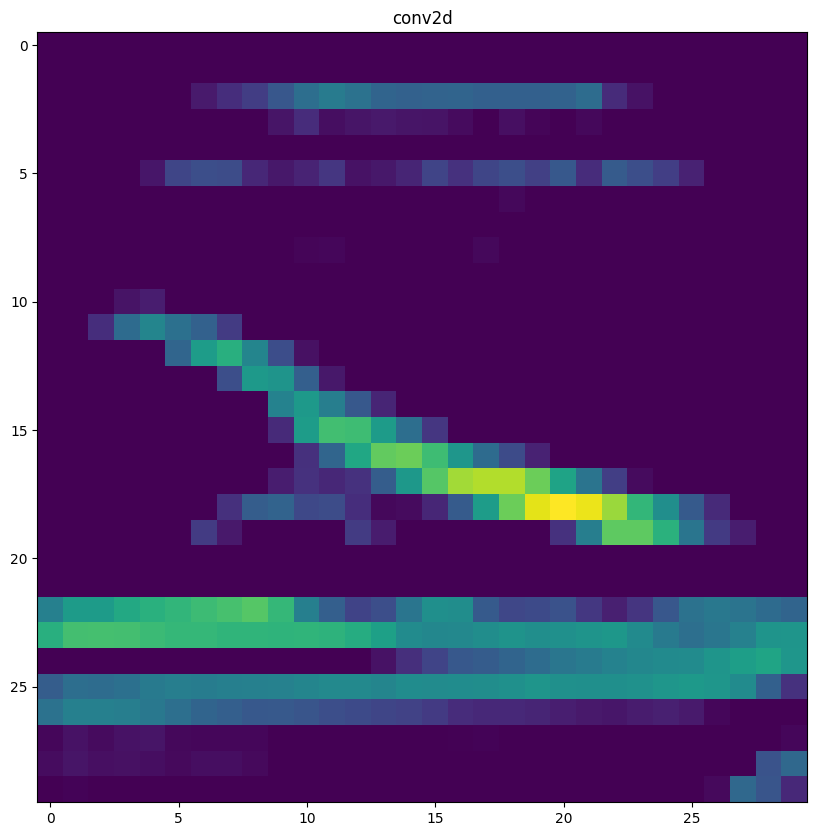

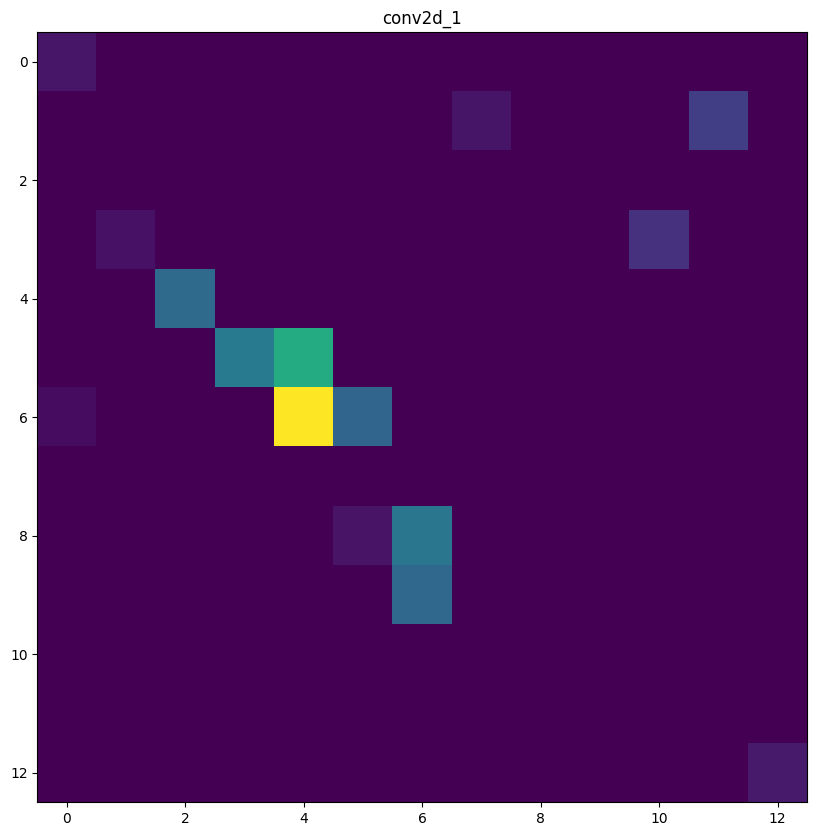

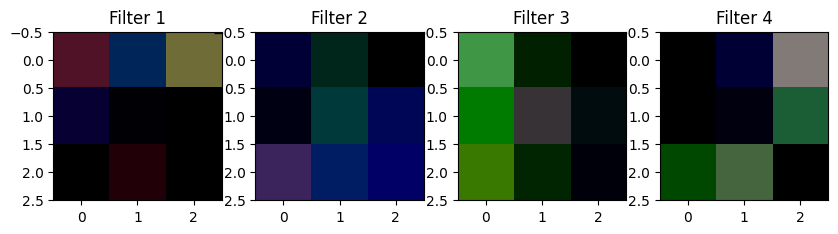

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras import datasets, layers, models


from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from PIL import Image



# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define A 3x3 filter (kernel) filter
det = np.array([[[[0]],[[1]],[[0]]],
                [[[0]],[[1]],[[0]]],
                [[[0]],[[1]],[[0]]]])

# custom Conv2D layer is defined using TensorFlow and Keras It is allows specifying  filter/kernel
class CustomConv2D(Layer):
    def __init__(self, filters, kernel_size, **kwargs):
        super(CustomConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=(*self.kernel_size, input_shape[-1], self.filters), initializer="glorot_normal", trainable=True)
        super(CustomConv2D, self).build(input_shape)

    def call(self, inputs):
        return tf.nn.conv2d(inputs, self.kernel, strides=[1, 1, 1, 1], padding='SAME')

# Input layer
input_layer = Input(shape=(32, 32, 3))

# Custom Conv2D layer with specified filter
custom_conv2d = CustomConv2D(filters=1, kernel_size=(3, 3))(input_layer)
max_pooling = MaxPooling2D((2, 2))(custom_conv2d)

# first part of model is build
model_part1 = Model(inputs=input_layer, outputs=max_pooling)

# Now it Compile the model
model_part1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Displaying model summary
model_part1.summary()

# Plot the output image after  the custom Conv2D layer is plotted alongside the original image.
output_img = model_part1.predict(np.expand_dims(train_images[0], axis=0))

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output_img[0, :, :, 0], cmap='gray')
plt.title('Output Image after Custom Conv2D')
plt.show()

# loading the image 'Mensa.jpg' and converted to an array and normalized
img_path = '/content/sample_data/Mensa.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Function to apply filter and plot images
def apply_filter_and_plot(model, img_array, filter_name):
    output_img = model.predict(img_array)
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array[0])
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(output_img[0, :, :, 0], cmap='gray')
    plt.title(f'Filtered Image: {filter_name}')
    plt.show()

# Apply filters to the image using the first model
apply_filter_and_plot(model_part1, img_array, 'Smooth')
apply_filter_and_plot(model_part1, img_array, 'Strengthen the Contour')
apply_filter_and_plot(model_part1, img_array, 'Strengthen the Details')
apply_filter_and_plot(model_part1, img_array, 'Sharpen all Edges')
apply_filter_and_plot(model_part1, img_array, 'Sharpen y- or x- Edges')
apply_filter_and_plot(model_part1, img_array, 'Sharpen the Image')
apply_filter_and_plot(model_part1, img_array, '3D Effect')

# Create the CNN for the second part created using a squential model with convolutional and dense layers
model_part2 = models.Sequential()
model_part2.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_part2.add(layers.MaxPooling2D((2, 2)))
model_part2.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Added second convolutional layer
model_part2.add(layers.MaxPooling2D((2, 2)))
model_part2.add(layers.Flatten())
model_part2.add(layers.Dense(256, activation='relu'))  # Last Dense layer with a weight matrix of 256x10
model_part2.add(layers.Dense(10))

# Displaying model summary
model_part2.summary()

# The second part of the model is compiled with a specific optimizer, loss function, and metric
model_part2.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

# Train the model
history = model_part2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# The training history, including accuracy and validation accuracy, is plotted
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Do a prediction for the image test_images[3:4]
img_part2 = test_images[3:4]
prediction_part2 = model_part2.predict(img_part2)
predicted_class_part2 = np.argmax(prediction_part2)
print("Predicted class:", class_names[predicted_class_part2])

# Plot the heatmap of the important features for the second model is plotted for convolutional layers
layer_outputs_part2 = [layer.output for layer in model_part2.layers]
heatmap_model_part2 = Model(inputs=model_part2.input, outputs=layer_outputs_part2)
heatmap_output_part2 = heatmap_model_part2.predict(img_part2)

for i, layer_output in enumerate(heatmap_output_part2):
    if 'conv' in model_part2.layers[i].name:
        plt.figure(figsize=(10, 10))
        plt.imshow(layer_output[0, :, :, 0], cmap='viridis')
        plt.title(model_part2.layers[i].name)
        plt.show()

# Plot the RGB images and the weights of the first convolutional layer for the second model
first_conv_layer_weights_part2 = model_part2.layers[0].get_weights()[0]
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(first_conv_layer_weights_part2[:, :, :, i], cmap='viridis')
    plt.title(f'Filter {i + 1}')
plt.show()
